Тема “Обучение без учителя”
===

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
data = boston.data
price = boston.target
feature_names = boston.feature_names

In [4]:
X = pd.DataFrame(data, columns = feature_names)

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X.shape

(506, 13)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
y = pd.DataFrame(price, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [16]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

Постройте диаграмму рассеяния на этих данных.

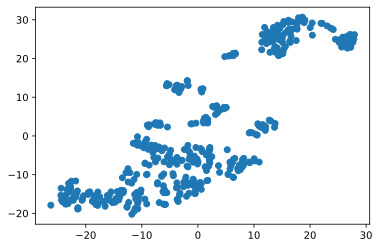

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [23]:
labels_train = kmeans.fit_predict(X_train_scaled)
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [24]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

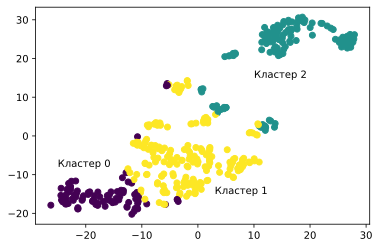

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-25, -8, 'Кластер 0')
plt.text(3, -15, 'Кластер 1')
plt.text(10, 15, 'Кластер 2')
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [26]:
# Кластер 0
y_train['price'][labels_train==0].mean()

27.788372093023252

In [27]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [28]:
# Кластер 1
y_train['price'][labels_train==1].mean()

16.165354330708666

In [29]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [30]:
# Кластер 2
y_train['price'][labels_train==2].mean()

24.958115183246072

In [31]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

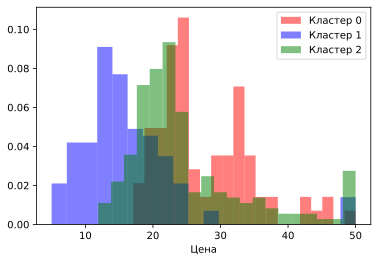

In [32]:
# Цена
plt.hist(y_train['price'][labels_train==0], color='red', bins = 20, density=True, alpha=0.5)
plt.hist(y_train['price'][labels_train==1], color='blue', bins = 20, density=True, alpha=0.5)
plt.hist(y_train['price'][labels_train==2], color='green', bins = 20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()

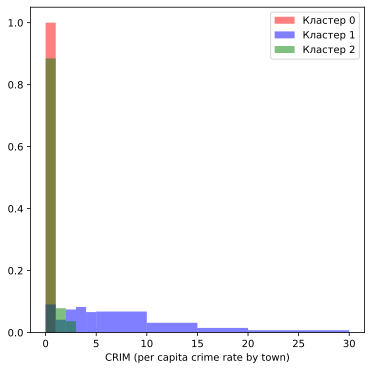

In [33]:
# CRIM
plt.figure(figsize=(6, 6))
plt.hist(X_train.loc[labels_train==0, 'CRIM'], color='red', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30], density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], color='blue', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30],density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], color='green', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30],density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')
plt.show()

***Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [34]:
labels_test = kmeans.fit_predict(X_test_scaled)
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2])

In [35]:
pd.value_counts(labels_test)

2    51
1    38
0    13
dtype: int64

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [36]:
# Кластер 0
y_test['price'][labels_test==0].mean()

34.55384615384615

In [37]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.08308461538461537

In [38]:
# Кластер 1
y_test['price'][labels_test==1].mean()

16.710526315789473

In [39]:
X_test.loc[labels_test==1, 'CRIM'].mean()

9.419181842105264

In [40]:
# Кластер 2
y_test['price'][labels_test==2].mean()

21.71764705882353

In [41]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.22250117647058823

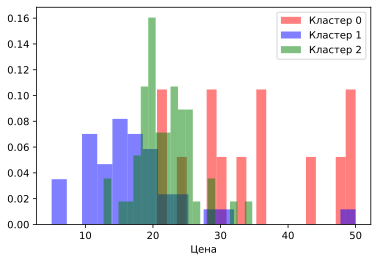

In [42]:
# Цена
plt.hist(y_test['price'][labels_test==0], color='red', bins = 20, density=True, alpha=0.5)
plt.hist(y_test['price'][labels_test==1], color='blue', bins = 20, density=True, alpha=0.5)
plt.hist(y_test['price'][labels_test==2], color='green', bins = 20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.show()

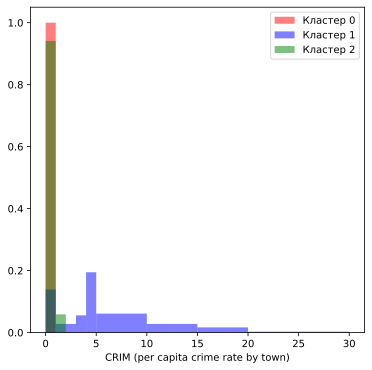

In [43]:
# CRIM
plt.figure(figsize=(6, 6))
plt.hist(X_test.loc[labels_test==0, 'CRIM'], color='red', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30], density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test==1, 'CRIM'], color='blue', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30],density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test==2, 'CRIM'], color='green', bins=[0, 1, 2, 3, 4, 5, 10, 15, 20, 30],density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')
plt.show()